In [32]:
import pandas as pd
import plotnine as pn
import pingouin as pg

In [82]:

def build_df(file, benchmark):
    """
    Build a dataframe from the CSV of diff sizes of a dataset.
    """
    df = pd.read_csv(file)
    df['TOTAL'] = df["INSERTED"] + df["DELETED"] + df["MODIFIED"]
    df['BENCHMARK'] = benchmark
    return df

def single_violin(df):
    """
    Build a violin plot from one dataset diff sizes.
    """
    return pn.ggplot(df, pn.aes(x='BENCHMARK', y='TOTAL')) + pn.geom_violin(df) + pn.scale_y_log10() + pn.xlab('') + pn.ylab('Diff size')

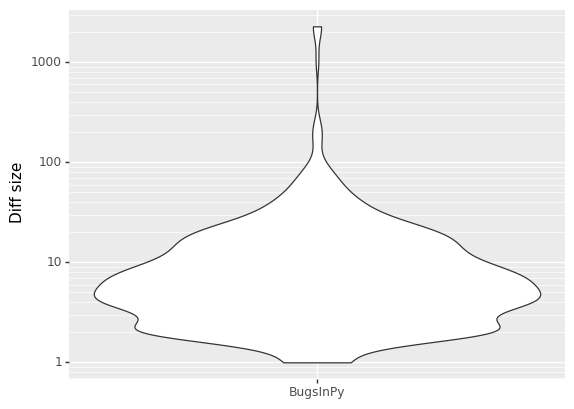

<ggplot: (312557848)>

In [78]:
bip_data = build_df('bugsinpy.csv', 'BugsInPy')
single_violin(bip_data)

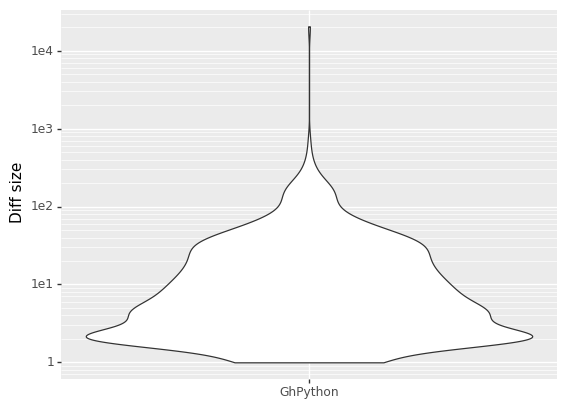

<ggplot: (312418175)>

In [79]:
ghp_data = build_df('gh-python.csv', 'GhPython')
single_violin(ghp_data)

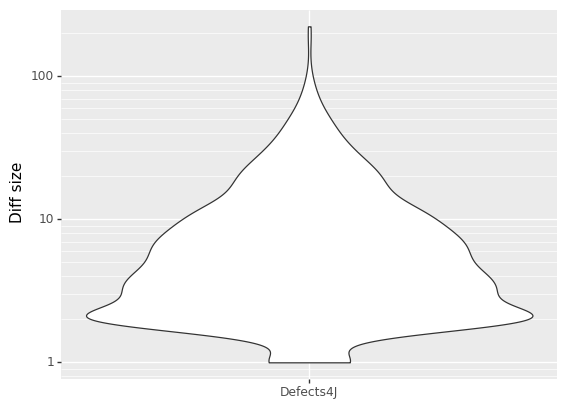

<ggplot: (314647447)>

In [80]:
d4j_data = build_df('defects4j.csv', 'Defects4J')
single_violin(d4j_data)

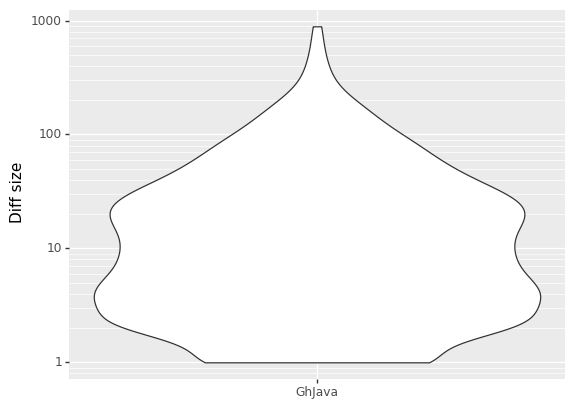

<ggplot: (311395079)>

In [83]:
ghj_data = build_df('gh-java.csv', "GhJava")
single_violin(ghj_data)

In [84]:
data = pd.concat([bip_data, d4j_data, ghp_data, ghj_data], ignore_index=True)
data.head()

,INSERTED,DELETED,MODIFIED,FILENAME,TOTAL,BENCHMARK
0,11,6,0,bugsinpy/before/keras/32/keras_callbacks.py,17,BugsInPy
1,16,3,0,bugsinpy/before/keras/35/keras_preprocessing_i...,19,BugsInPy
2,6,0,0,bugsinpy/before/keras/34/keras_utils_data_util...,6,BugsInPy
3,16,4,0,bugsinpy/before/keras/34/keras_engine_training.py,20,BugsInPy
4,13,4,0,bugsinpy/before/keras/33/keras_preprocessing_t...,17,BugsInPy


/usr/local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: sizes.pdf


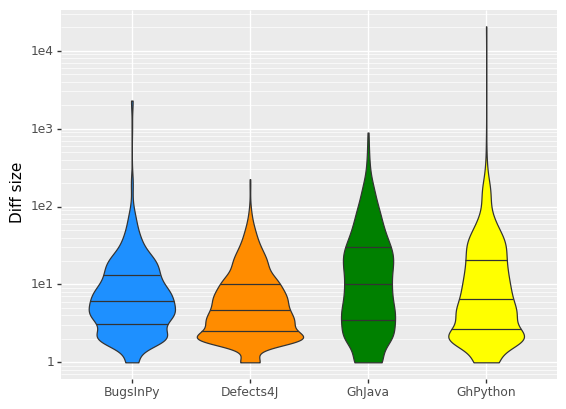

<ggplot: (314587112)>

In [85]:
plot = pn.ggplot(data, pn.aes(x='BENCHMARK', y='TOTAL', fill='BENCHMARK')) + pn.geom_violin(data, show_legend=False, draw_quantiles=[0.25, 0.5, 0.75]) + pn.scale_y_log10() + pn.xlab("") + pn.ylab("Diff size") + pn.scale_fill_manual(values=['dodgerblue', 'darkorange', 'green', 'yellow'])
pn.ggplot.save(plot, "sizes.pdf")
plot


In [41]:
pg.mwu(bip_data["TOTAL"], d4j_data["TOTAL"])

,U-val,alternative,p-val,RBC,CLES
MWU,381597.0,two-sided,0.000003,-0.134729,0.567365


In [86]:
pg.mwu(ghp_data["TOTAL"], ghj_data["TOTAL"])

,U-val,alternative,p-val,RBC,CLES
MWU,438716.5,two-sided,0.000002,0.122567,0.438717
